In [255]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [256]:
np.random.seed(42)
df = pd.read_csv("datos_accidentes_cerebrovasculares.csv")

In [257]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [258]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [259]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: >

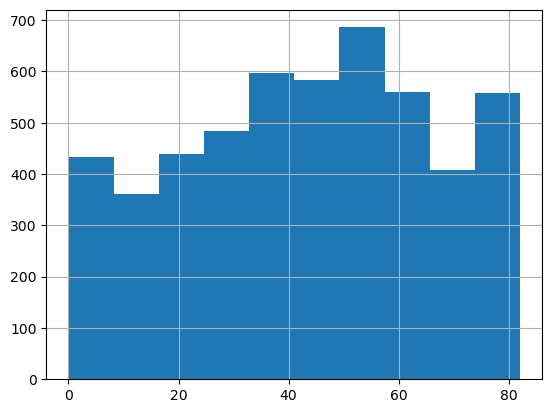

In [260]:
df.age.hist()

In [261]:
df.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [262]:
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [263]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


<Axes: >

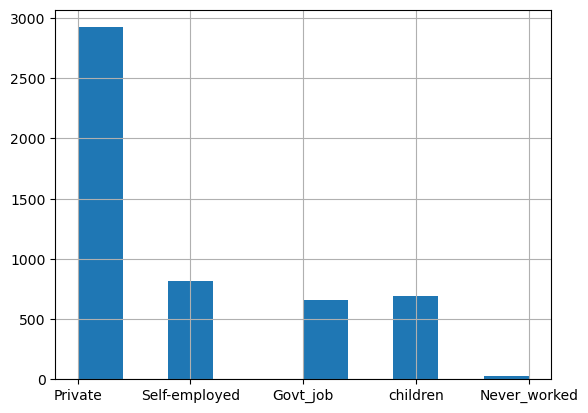

In [264]:
print(df.work_type.value_counts())
df.work_type.hist()

In [265]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [266]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: >

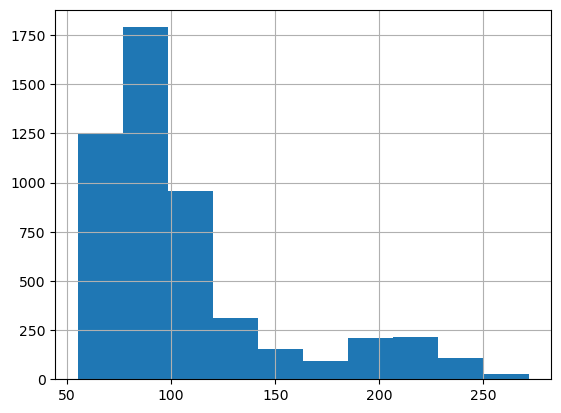

In [267]:
df.avg_glucose_level.hist()

In [268]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<Axes: >

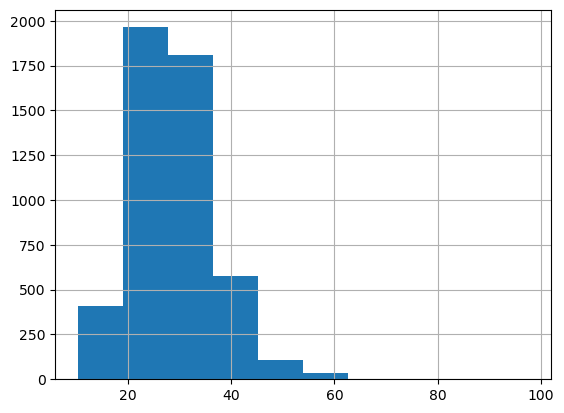

In [269]:
df.bmi.hist()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


<Axes: >

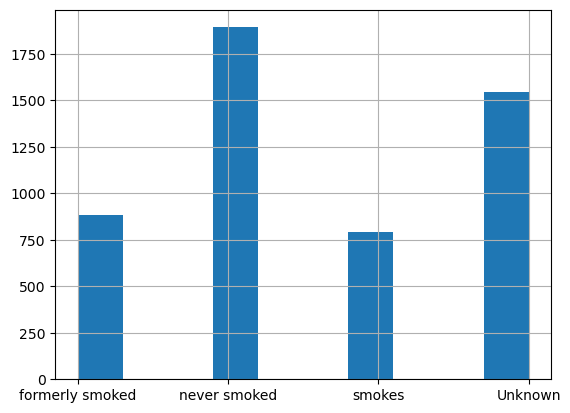

In [270]:
print(df.smoking_status.value_counts())
df.smoking_status.hist()

In [271]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [272]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [273]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [274]:
df.gender = df.gender.astype('category')
df.age = df.age.astype('int64')
df.hypertension = df.hypertension.astype('bool')
df.heart_disease = df.heart_disease.astype('bool')
df.work_type = df.work_type.astype('category')
df.Residence_type = df.Residence_type.astype('category')
df.avg_glucose_level = df.avg_glucose_level.astype('float64')
df.bmi = df.bmi.astype('float64')
df.smoking_status = df.smoking_status.astype('category')
df.stroke = df.stroke.astype('bool')

Eliminamos el id, ya que es una columna que obviamente no aporta ningun valor

In [275]:
df.drop('id', axis=1, inplace=True)

Ya que Residence_type solo tiene 2 clases, se transformará la variable a un booleano

In [276]:
df.Residence_type.replace('Urban', 1, inplace=True)
df.Residence_type.replace('Rural', 0, inplace=True)
df.Residence_type = df.Residence_type.astype('bool')

Lo mismo con ever_married

In [277]:
df.ever_married.replace('Yes', 1, inplace=True)
df.ever_married.replace('No', 0, inplace=True)
df.ever_married = df.ever_married.astype('bool')
df.ever_married

0       True
1       True
2       True
3       True
4       True
        ... 
5105    True
5106    True
5107    True
5108    True
5109    True
Name: ever_married, Length: 5110, dtype: bool

In [278]:
df.ever_married.value_counts()

ever_married
True     3353
False    1757
Name: count, dtype: int64

In [279]:
df.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [280]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [281]:
imputer = SimpleImputer(strategy='mean')
df.bmi = imputer.fit_transform(df['bmi'].values.reshape(-1,1))

<Axes: >

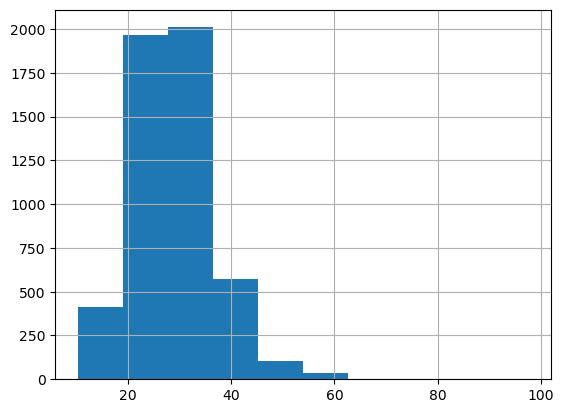

In [282]:
df.bmi.hist()

In [283]:
encoder = OneHotEncoder()
gender_encoded = encoder.fit_transform(df.gender.values.reshape(-1,1)).toarray()
gender_df = pd.DataFrame(gender_encoded, columns=encoder.categories_[0])
gender_df = gender_df.astype('bool')
gender_df.dtypes

Female    bool
Male      bool
Other     bool
dtype: object

In [284]:
encoder = OneHotEncoder()
work_type_encoded = encoder.fit_transform(df.work_type.values.reshape(-1,1)).toarray()
work_df = pd.DataFrame(work_type_encoded, columns=encoder.categories_[0])
work_df = work_df.astype('bool')
work_df

,Govt_job,Never_worked,Private,Self-employed,children
0,False,False,True,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,False,True,False
...,...,...,...,...,...
5105,False,False,True,False,False
5106,False,False,False,True,False
5107,False,False,False,True,False
5108,False,False,True,False,False


In [285]:
encoder = OneHotEncoder()
smoking_status_encoded = encoder.fit_transform(df.smoking_status.values.reshape(-1,1)).toarray()
smoking_df = pd.DataFrame(smoking_status_encoded, columns=encoder.categories_[0])
smoking_df = smoking_df.astype('bool')
smoking_df

,Unknown,formerly smoked,never smoked,smokes
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
5105,False,False,True,False
5106,False,False,True,False
5107,False,False,True,False
5108,False,True,False,False


In [286]:
transformed_df = df.copy()
transformed_df = pd.concat([transformed_df, gender_df, work_df, smoking_df], axis=1)
transformed_df.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)
transformed_df.dtypes

age                    int64
hypertension            bool
heart_disease           bool
ever_married            bool
Residence_type          bool
avg_glucose_level    float64
bmi                  float64
stroke                  bool
Female                  bool
Male                    bool
Other                   bool
Govt_job                bool
Never_worked            bool
Private                 bool
Self-employed           bool
children                bool
Unknown                 bool
formerly smoked         bool
never smoked            bool
smokes                  bool
dtype: object

In [287]:
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(df.age.values.reshape(-1,1))
age_scaled_df = pd.DataFrame(age_scaled, columns=['age_scaled'])
age_scaled_df

,age_scaled
0,0.817073
1,0.743902
2,0.975610
3,0.597561
4,0.963415
...,...
5105,0.975610
5106,0.987805
5107,0.426829
5108,0.621951


In [288]:
scaler = MinMaxScaler()
glucose_scaled = scaler.fit_transform(df.avg_glucose_level.values.reshape(-1,1))
avg_glucose_df = pd.DataFrame(glucose_scaled, columns=['glucose_scaled'])
avg_glucose_df

,glucose_scaled
0,0.801265
1,0.679023
2,0.234512
3,0.536008
4,0.549349
...,...
5105,0.132167
5106,0.323516
5107,0.128658
5108,0.513203


In [289]:
scaler = MinMaxScaler()
bmi_scaled = scaler.fit_transform(df.bmi.values.reshape(-1,1))
bmi_scaled_df = pd.DataFrame(bmi_scaled, columns=['bmi_scaled'])
bmi_scaled_df

,bmi_scaled
0,0.301260
1,0.212981
2,0.254296
3,0.276060
4,0.156930
...,...
5105,0.212981
5106,0.340206
5107,0.232532
5108,0.175258


In [290]:
final_df = pd.concat([transformed_df, age_scaled_df, avg_glucose_df, bmi_scaled_df], axis = 1)
final_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)
final_df

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,glucose_scaled,bmi_scaled
0,False,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.817073,0.801265,0.301260
1,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.743902,0.679023,0.212981
2,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,0.975610,0.234512,0.254296
3,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,True,0.597561,0.536008,0.276060
4,True,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.963415,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,0.975610,0.132167,0.212981
5106,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.987805,0.323516,0.340206
5107,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,0.426829,0.128658,0.232532
5108,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.621951,0.513203,0.175258


In [291]:
final_df

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,glucose_scaled,bmi_scaled
0,False,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.817073,0.801265,0.301260
1,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.743902,0.679023,0.212981
2,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,0.975610,0.234512,0.254296
3,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,True,0.597561,0.536008,0.276060
4,True,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.963415,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,0.975610,0.132167,0.212981
5106,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.987805,0.323516,0.340206
5107,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,0.426829,0.128658,0.232532
5108,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.621951,0.513203,0.175258


<Axes: >

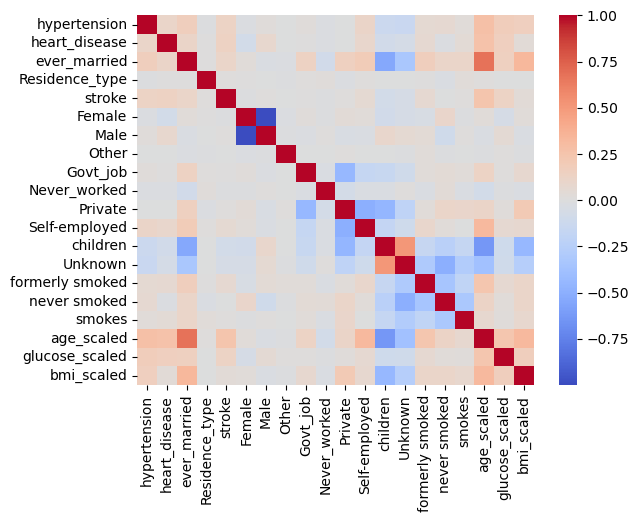

In [295]:
import seaborn as sns

sns.heatmap(final_df.corr(), cmap='coolwarm', fmt=".2f")